# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor = .1, noise = .1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

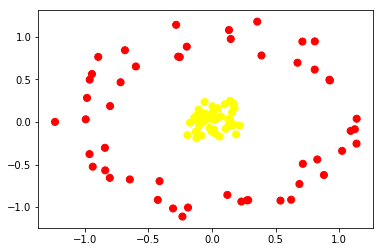

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

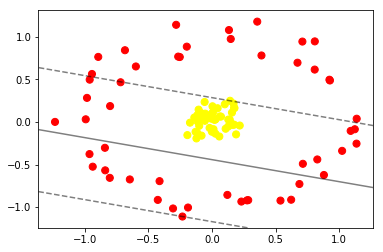

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.96669329, 0.96785052, 0.27406865, 0.33371666, 0.32415742,
       0.94847215, 0.97257396, 0.52424901, 0.37871905, 0.34266567,
       0.94457131, 0.30159652, 0.98910477, 0.3076647 , 0.98312353,
       0.2757899 , 0.94881462, 0.43982078, 0.96417958, 0.33428686,
       0.47308235, 0.46751192, 0.37240713, 0.21761371, 0.99842373,
       0.99188453, 0.99661705, 0.94402237, 0.97805326, 0.44838499,
       0.41734756, 0.98758659, 0.4797058 , 0.3190953 , 0.98705382,
       0.31321435, 0.98241173, 0.92762734, 0.51689735, 0.97015159,
       0.24778947, 0.28173282, 0.25135794, 0.94326986, 0.99209205,
       0.31304573, 0.96842227, 0.94419847, 0.36044074, 0.99258132,
       0.97343604, 0.99060648, 0.41544031, 0.97635036, 0.97008717,
       0.94032913, 0.25049808, 0.97965264, 0.97024534, 0.45682518,
       0.29491489, 0.52016557, 0.21999854, 0.98437097, 0.35727363,
       0.96928938, 0.21275775, 0.35138365, 0.98028843, 0.98551133,
       0.95210884, 0.39557675, 0.39720193, 0.92140749, 0.35092

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [11]:
from ipywidgets import interact, fixed

In [13]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.21132320e-03,  1.84020924e-01],
       [-8.27640540e-02, -1.60710091e-01],
       [ 1.13707775e+00,  3.78264914e-02],
       [ 9.22852957e-01,  4.95787637e-01],
       [-3.06954272e-01, -1.01602417e+00],
       [ 1.00042986e-01,  2.07109280e-01],
       [ 4.34720590e-02,  1.60994820e-01],
       [-2.53932808e-01,  7.62434676e-01],
       [ 1.46847835e-01,  9.74369725e-01],
       [-9.63666765e-01, -3.77288217e-01],
       [ 1.88807071e-01, -1.46205289e-01],
       [ 1.08978826e+00, -1.05008290e-01],
       [-8.01190607e-02,  6.73495062e-02],
       [-6.85004792e-01,  8.42326039e-01],
       [ 1.27488849e-01,  2.76964527e-02],
       [-2.33027115e-01, -1.11077194e+00],
       [-1.22925891e-01, -1.93471089e-01],
       [-1.98761120e-01,  8.84240904e-01],
       [ 1.56339891e-01,  1.09706656e-01],
       [ 9.26658245e-01,  4.86888381e-01],
       [ 1.20306122e-01, -8.56745138e-01],
       [ 3.88434995e-01,  7.80671941e-01],
       

In [14]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

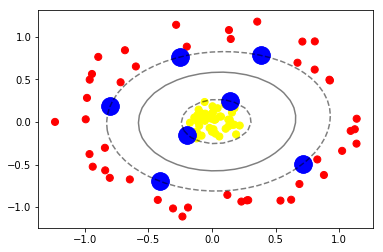

In [15]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

# Ajustar los parámetros de SVM

In [16]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

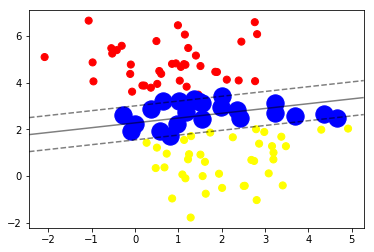

In [17]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

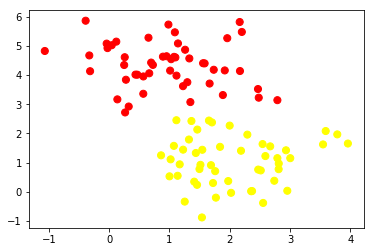

In [18]:

X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

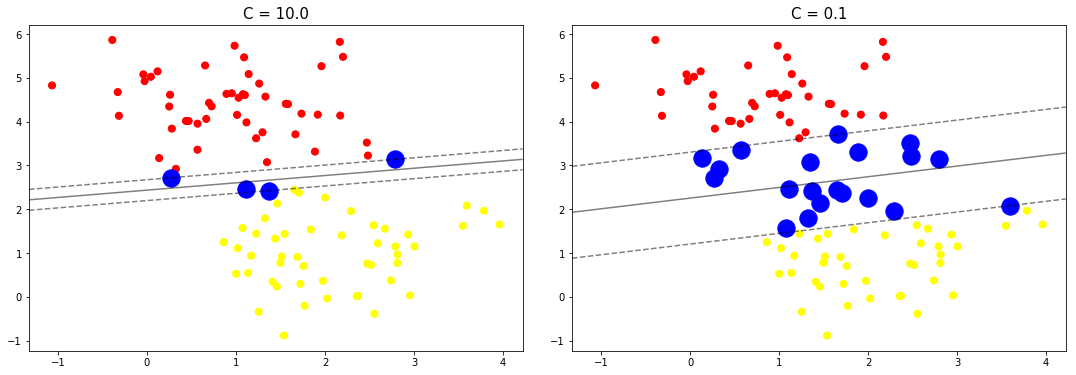

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)